## 线性放大器接口电路设计

1.得到运放的转移特性方程
2.结合电路需要满足的指标，确定方程符合哪种形式
3.对应的情况下，求出电阻值


### 方程形式
$y=\pm mx \pm b$


斜率m和截距b的不同，有四种形式的解法。


Vout = + m Vin +b

Vout = + m Vin -b

Vout = - m Vin +b

Vout = - m Vin -b

给定两组数据可解

例子：
设计接口电路，链接输出电压为0.1~0.2V的传感器，和输入电压为1~4V的AD转换器。

可确定一条直线所需的两点
1. Vo=1v,Vin=0.1v
2. Vo=4V,Vin = 0.2v


In [238]:
def solve_linear_interface(in_low,out_low,in_high,out_high):
    from sympy import symbols,Eq,solve
    Vcc = 5;
    #--------------------------------------------------
    m,b = symbols('m b');
    #Vout = m Vin +b
    #
    eqs= [
        Eq(in_low*m+b,out_low),
        Eq(in_high*m +b ,out_high)

    ]
    result1 =solve(eqs,[m,b])
    m1=result1[m]
    b1=result1[b]

    if (m1>=0 ) and b1>=0:
        r1 = 10* 1000# 10k om
        r2 = r1 * m1*Vcc / b1

        rf_devide_rg = m1*(r1+r2)/r2 -1

        print(f"function :: Vout = {round(m1,4)} Vin + {round(b1,4)}")
        print(f'r1={r1} , r2 {round(r2,4)} ')
        print(f'Rg = {round(rf_devide_rg,2) } Rf')
        print(f'Rg =10k , Rf~={round(10000*rf_devide_rg,2)}')
    
    if (m1>=0)and b1<0:
        #假设r1\| r2 << Rg
        rg = 20000#20k
        rf = (m1-1) * rg
        print(f'Rg=20k  , Rf = {round(rf/1000 )}k')

        r1_devide_r2= Vcc * rf / rg / b1*(-1) -1
        print(r1_devide_r2)
        r2 = 820
        r1 = r2 * r1_devide_r2
        print(f"r2={r2} om,  r1 = {round(r1/1000,2)} k om")

    if (m1<0) and b1 >= 0:
        print(m1,b1)
        rg = 10000

        rf = (-1) *m1* rg
        #print(rf)
        #print(b1)

        r1=2000
        r2= (Vcc  * (rf+rg)  /(b1*rg)  -1)  * r1
        #print(r2)
 
        print(f'Rg={round(rg/1000)} k om  , Rf = {round(rf/1000 )}k om')
        print(f"r2={round(r2/1000)} om,  r1 = {round(r1/1000,2)} k om")
        print(f"function :: Vout = {round(m1,4)} Vin + {round(b1,4)}")
    
    if(m1<0 ) and b1<0:
        print(m1,b1)
        rg1 = 1000
        rf = -1 * m1 * rg1
        print(f'Rg1= {round(rg1/1000)} k om  , Rf= {round(rf/1000 )} k om')
        rg2 = Vcc*rf/(-1 * b1)
        print(f'Rg2= {round(rg2/1000) } k om ')
        print(f"function :: Vout = {round(m1,4)} Vin  {round(b1,4)}")



solve_linear_interface(-0.1,1,-0.3,5)
        

-20.0000000000000 -1.00000000000000
Rg1= 1 k om  , Rf= 20 k om
Rg2= 100 k om 
function :: Vout = -20.0000000000000 Vin  -1.00000000000000


In [113]:
#solve 解精确解
from sympy import symbols,Eq,solve

m,b = symbols('m b');

eqs= [
    Eq(0.01*m+b,1),
    Eq(1*m +b ,4.5)
]

aa =solve(eqs,[m,b])
#print(aa)
print(aa.keys())
for i in aa.keys():
    print(i)





dict_keys([m, b])
m
b


所以
Vo=30 * Vin  -2

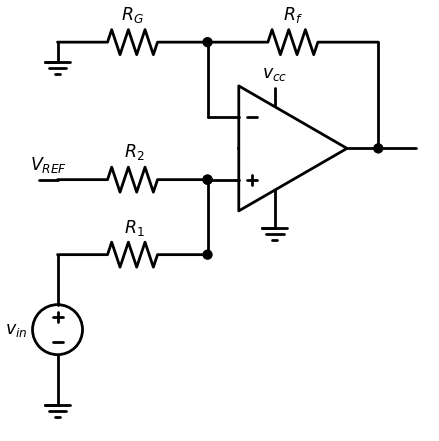

In [132]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='+m Vin +b.svg')as d:
    elm.style(elm.STYLE_IEEE)

    op = elm.Opamp(leads=True)
    out = elm.Line().at(op.out).length(.75)
    elm.Line().up().at(op.in1).length(1.5).dot()
    d.push()
    elm.Resistor().left().label('$R_G$')
    elm.Ground()
    d.pop()

    elm.Resistor().tox(op.out).label('$R_f$')
    elm.Line().toy(op.out).dot()


    elm.Resistor().left().at(op.in2).idot().label('$R_2$')
    elm.Line().left(d.unit/8).label('$V_{REF}$')
    elm.Line().down(d.unit/2).at(op.in2).idot()#.label('$R_2$')
    elm.Resistor().left().idot().label('$R_1$')
    elm.SourceV().down().reverse().label('$v_{in}$')
    elm.Ground(lead=False)
    # elm.Line().right().dot()
    # elm.Resistor().up().label('$R_3$').hold()
    # elm.Line().tox(out.end)
    # elm.Gap().toy(op.out).label(['–','$v_o$','+'])
    #///////////


    elm.Line().up(d.unit/8).at(op.vd).label('$v_{cc}$', loc='right')
    elm.Line().down(d.unit/4).at(op.vs)
    elm.Ground(lead=False)#.up(d.unit/8)#.at(op.vs)#.label('$G_{nd}$', loc='right')

#Vout = +m *Vin +b

## 上图为Vout = +m Vin +b

#此电路方程 +m +b

$
V_{OUT} = [V_{IN} ( \frac{R_2}{R_1+R_2} )   + 
        V_{REF} ( \frac{R_1}{R_1+R_2} ) 
]
*
          (  \frac{R_F+R_G}{R_G}   )
$

$
V_{OUT}=V_{IN} ( \frac{R_2}{R_1+R_2} )(  \frac{R_F+R_G}{R_G}   )  +V_{REF} ( \frac{R_1}{R_1+R_2} ) (  \frac{R_F+R_G}{R_G}   )
$

$
V_{OUT}=m V_{IN} +b
$

$
m=( \frac{R_2}{R_1+R_2} )(  \frac{R_F+R_G}{R_G}   )
$

$
b=V_{REF} ( \frac{R_1}{R_1+R_2} ) (  \frac{R_F+R_G}{R_G}   )
$

------------------

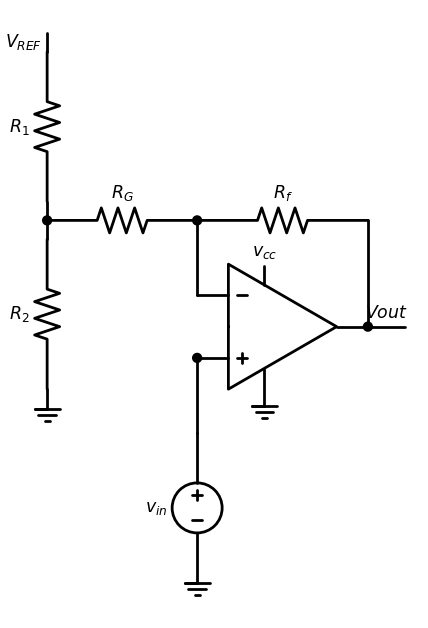

In [148]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='+m Vin -b.svg')as d:
    elm.style(elm.STYLE_IEEE)

    op = elm.Opamp(leads=True)
    out = elm.Line().at(op.out).length(.75).label('$  Vout$')
    elm.Line().up().at(op.in1).length(1.5).dot()
    d.push()#位置压栈（暂存） pop取出位置
    elm.Resistor().left().label('$R_G$')
    d.push()
    elm.Line().down(d.unit/8).idot()
    elm.Resistor().label('$R_2$')
    elm.Ground()

    d.pop()
    elm.Line().up(d.unit/8)
    elm.Resistor().label('$R_1$')
    elm.Line().up(d.unit/8).label('$V_{REF}$')



    d.pop()



    elm.Resistor().tox(op.out).label('$R_f$')
    elm.Line().toy(op.out).dot()


    #elm.Resistor().left().at(op.in2).idot().label('$  R_2$')
    
    
    
    elm.Line().down(d.unit/2).at(op.in2).idot()#.label('$R_2$')
    #elm.Resistor().left().idot().label('$R_1$')
    elm.SourceV().down().reverse().label('$v_{in}$')
    elm.Ground(lead=False)
    # elm.Line().right().dot()
    # elm.Resistor().up().label('$R_3$').hold()
    # elm.Line().tox(out.end)
    # elm.Gap().toy(op.out).label(['–','$v_o$','+'])
    #///////////


    elm.Line().up(d.unit/8).at(op.vd).label('$v_{cc}$', loc='right')
    elm.Line().down(d.unit/4).at(op.vs)
    elm.Ground(lead=False)#.up(d.unit/8)#.at(op.vs)#.label('$G_{nd}$', loc='right')

#### 上图 +m-b

#此电路方程 +m -b

$
Rx= R_G + R_1 \| R_2
$


$$
V_{OUT} = V_{IN} ( \frac{R_F+ Rx}{Rx} )   -
V_{REF} ( \frac{R_2}{R_1+R_2} )
*
(  \frac{R_F}{R_x}   )
$$


$
V_{OUT}=m V_{IN} +b
$

$
m=( \frac{R_F+R_G+ R_1 \| R_2}{ R_G + R_1 \| R_2} )
$

$
b=V_{REF} ( \frac{R_2}{R_1+R_2} ) (  \frac{R_F}{R_G+ R_1 \| R_2}   )
$

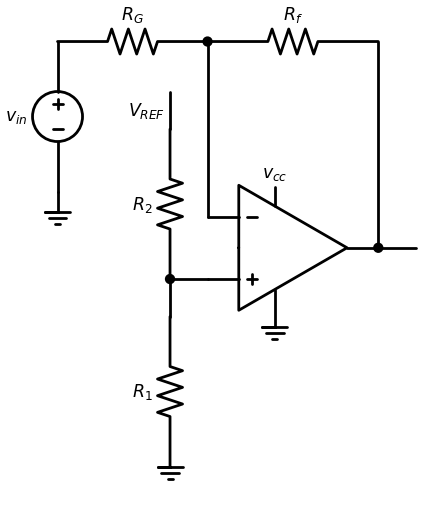

In [206]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='-m Vin +b.svg')as d:
    elm.style(elm.STYLE_IEEE)

    op = elm.Opamp(leads=True)
    out = elm.Line().at(op.out).length(.75)
    elm.Line().up().at(op.in1).length(3.5).dot()
    d.push()
    elm.Resistor().left().label('$R_G$')

    elm.SourceV().down().reverse().label('$v_{in}$')
    elm.Ground()
    d.pop()

    elm.Resistor().tox(op.out).label('$R_f$')
    elm.Line().toy(op.out).dot()

    elm.Line().left(d.unit/4).at(op.in2)
    d.push()
    elm.Resistor().up().label('$R_2$')
    elm.Line().up(d.unit/4).label('$V_{REF}$')
    
    d.pop()
    elm.Line().down(d.unit/4).idot()#.label('$R_2$')
    elm.Resistor().down().label('$R_1$')
    elm.Ground(lead=False)


    elm.Line().up(d.unit/8).at(op.vd).label('$v_{cc}$', loc='right')
    elm.Line().down(d.unit/4).at(op.vs)
    elm.Ground(lead=False)#.up(d.unit/8)#.at(op.vs)#.label('$G_{nd}$', loc='right')

#Vout = +m *Vin +b

#### 上图 -m-b
m =Rf/Rg

b= Vref(r1/(r1+r2) *(Rf+Rg)/Rg)

实际应用时，反向输入端并联肖特基二极管（断电时，负电压存在钳位到地），参考电压并联对地电容退耦和。

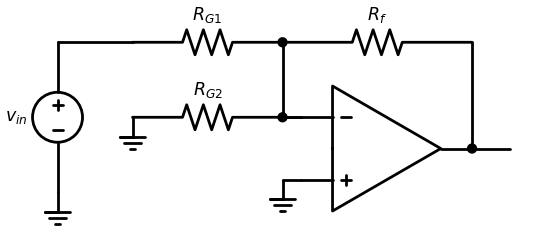

In [239]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='-m Vin -b.svg')as d:
    elm.style(elm.STYLE_IEEE)

    op = elm.Opamp(leads=True)
    out = elm.Line().at(op.out).length(.75)
    
    elm.Line().left(d.unit/8).at(op.in1)
    elm.Line().up().length(1.5).dot()
    d.push()
    #rg1
    elm.Resistor().left().label('$R_{G1}$')
    elm.Line().left(d.unit/2)

    elm.SourceV().down().reverse().label('$v_{in}$')
    elm.Ground()
    d.pop()

    elm.Resistor().tox(op.out).label('$R_f$')
    elm.Line().toy(op.out).dot()

    #rg2
    elm.Line().left(d.unit/8).at(op.in1).dot()
    elm.Resistor().left().label('$R_{G2}$')
    elm.Ground()

    #  + in
    elm.Line().left(d.unit/8).at(op.in2)
    elm.Line().down(d.unit/8)
    elm.Ground(lead=False)


#### 上图 -m+b

实际应用时，反向输入端并 肖特基二极管（断电时，负电压存在钳位到地），参考电压并联对地电容退耦和。

In [ ]:

    d.push()
    elm.Resistor().up().label('$R_2$')
    elm.Line().up(d.unit/4).label('$V_{REF}$')
    
    d.pop()
    elm.Line().down(d.unit/4).idot()#.label('$R_2$')
    elm.Resistor().down().label('$R_1$')
    elm.Ground(lead=False)


    elm.Line().up(d.unit/8).at(op.vd).label('$v_{cc}$', loc='right')
    elm.Line().down(d.unit/4).at(op.vs)
    elm.Ground(lead=False)#.up(d.unit/8)#.at(op.vs)#.label('$G_{nd}$', loc='right')


m=30 b=-2
